<a href="https://colab.research.google.com/github/jonnes-nascimento/machine_learning/blob/master/Introdu%C3%A7%C3%A3o_a_Machine_Learning_e_Classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação do arquivo CSV e análise gráfica dos dados


In [1]:
!pip install seaborn==0.9.0

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

a_renomear = {
    "unfinished" : "nao_finalizado",
    "expected_hours" : "horas_esperadas",
    "price" : "preco"

}

dados = dados.rename(columns = a_renomear)

substituir = {
    0 : 1,
    1 : 0
}

dados["finalizado"] = dados.nao_finalizado.map(substituir)

dados.tail()

nao_finalizado  horas_esperadas  preco  finalizado
2152               0               80   7518           1
2153               1               52   1332           0
2154               0               40    473           1
2155               0               75   5324           1
2156               1               37    377           0

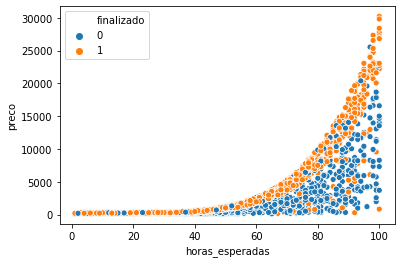

In [3]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

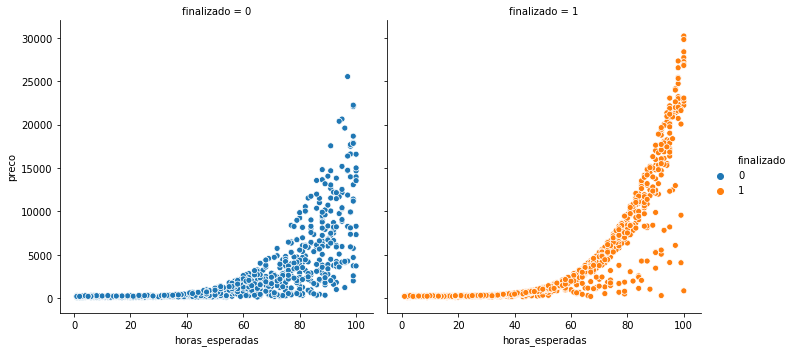

In [4]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

# Cálculo da acurácia dos dados de teste

In [38]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 4

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi de %2.f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos 540 elementos
A acurácia foi de 48%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
# O resultado obtido acima parece bem ruim (54% de acuracia). Para termos certeza de que esse e um mal resultado, criaremos
# um conjunto de dados onde todos os 540 projetos foram finalizados e passaremos para nosso modelo calcular a nova acuracia.
# Com isso, conseguimos ter uma base de se o resultado anterior foi ruim ou nao.

import numpy as np

baseline = np.ones(540) # cria um conjunto de previsoes com 540 'uns' - a baseline e o parametro que devemos superar quando contruimos estimadores e devemos ser muito melhores que ela
acuracia = accuracy_score(teste_y, baseline) * 100

print("A acurácia foi de %2.f%%" % acuracia)

A acurácia foi de 53%


# Análise da base de dados de testes e da acurácia do modelo 

In [40]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

PIXELS = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/PIXELS) # vai do minimo ao maximo, em passos de tamanho definido
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/PIXELS) # vai do minimo ao maximo, em passos de tamanho definido

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos # um array na forma [[x,y], [x,y]...]

1 100 100 27343


array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.707057e+04],
       [9.802000e+01, 2.707057e+04],
       [9.901000e+01, 2.707057e+04]])

In [41]:
Z = modelo.predict(pontos) # em contrapartida a modelo.predict(teste_x)

print("Z shape:", Z.shape)
print("xx shape: ", xx.shape)

Z = Z.reshape(xx.shape)

print("New Z shape:", Z.shape)

Z shape: (10000,)
xx shape:  (100, 100)
New Z shape: (100, 100)


# Plotando os dados do modelo para verificar sua integridade

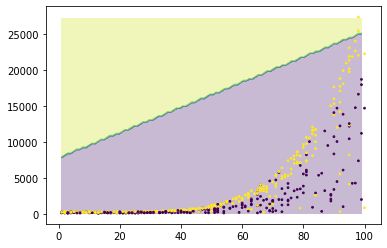

In [42]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3) # pinta cada ponto (pixel) do grafico com a cor de Z, de acordo com as coordenadas xx e yy
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=3)

# Neste grafico, percebe-se que a curva de decisao do algoritmo esta enviesada (existe uma linha quase paralela ao eixo x do grafico) indicando que todos os projetos receberam classificacao 1
# Se alterarmos a variancia de ordenacao (SEED = 4), veremos que a curva de decisao e linear, o que nao serve para nosso proposito e ainda mais: o resultado e enviesado para classificacao = 0 em todos os projetos